Question 1. Part A

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
spambase = fetch_ucirepo(id=94)

In [5]:
X = spambase.data.features
y = spambase.data.targets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Regularization parameters to test
C_values = [0.001, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    # Train the SVM model with a linear kernel
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # Generate predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy and append to accuracies list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print accuracy, precision, recall, and F1-score for each C value
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Results for C={C}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("----------------------------")

Results for C=0.001:
Accuracy: 0.8653637350705755
Precision: 0.8756824244680191
Recall: 0.8508981602201942
F1-Score: 0.8582007270993504
----------------------------
Results for C=0.1:
Accuracy: 0.9250814332247557
Precision: 0.9263072776280323
Recall: 0.920049253947559
F1-Score: 0.9227500209690497
----------------------------
Results for C=1:
Accuracy: 0.9229098805646037
Precision: 0.9244579945799458
Recall: 0.9174851513834564
F1-Score: 0.9204486147759663
----------------------------
Results for C=10:
Accuracy: 0.9185667752442996
Precision: 0.9167278736687476
Recall: 0.9164421266116182
F1-Score: 0.9165838442560292
----------------------------
Results for C=100:
Accuracy: 0.9131378935939196
Precision: 0.9106473766844219
Recall: 0.9117340286831812
F1-Score: 0.9111724084718954
----------------------------


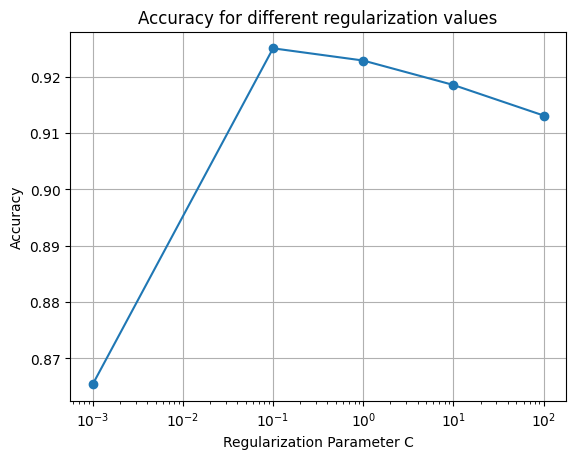

In [8]:
# Plotting the accuracies for different C values
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.title('Accuracy for different regularization values')
plt.grid(True)
plt.show()

Part B

In [9]:
# Define kernels and their parameters
kernels = [
    ('poly', 2),
    ('poly', 3),
    ('sigmoid', None),
    ('rbf', None)
]

In [10]:
for kernel, degree in kernels:
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=degree)
    else:
        svm_model = SVC(kernel=kernel)

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Generate predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate and print accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Results for kernel={kernel} {'with degree ' + str(degree) if degree else ''}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("----------------------------")

Results for kernel=poly with degree 2:
Accuracy: 0.6492942453854506
Precision: 0.7507022471910112
Recall: 0.5896421845574388
F1-Score: 0.5443506204078257
----------------------------
Results for kernel=poly with degree 3:
Accuracy: 0.6254071661237784
Precision: 0.7384959969500572
Recall: 0.5604157612632189
F1-Score: 0.49350512719557627
----------------------------
Results for kernel=sigmoid :
Accuracy: 0.6351791530944625
Precision: 0.6247230837394772
Recall: 0.6223381138635375
F1-Score: 0.6230816451810928
----------------------------
Results for kernel=rbf :
Accuracy: 0.6623235613463626
Precision: 0.6619731916435214
Recall: 0.629537882080255
F1-Score: 0.6262862958203133
----------------------------


Part C

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
from ucimlrepo import fetch_ucirepo
spambase = fetch_ucirepo(id=94)

In [13]:
X = spambase.data.features
y = spambase.data.targets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define polynomial degrees and regularization parameters
degrees = [1, 1, 3, 3]
C_values = [0.01, 100, 0.01, 100]

In [16]:
train_accuracies = []
test_accuracies = []


In [17]:
for degree, C in zip(degrees, C_values):
    svm_model = SVC(kernel='poly', degree=degree, C=C)

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Generate predictions on the train and test sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Calculate and store train and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Results for degree={degree} and C={C}:")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("----------------------------")

Results for degree=1 and C=0.01:
Train Accuracy: 0.6635869565217392
Test Accuracy: 0.6210640608034745
----------------------------
Results for degree=1 and C=100:
Train Accuracy: 0.7845108695652174
Test Accuracy: 0.760043431053203
----------------------------
Results for degree=3 and C=0.01:
Train Accuracy: 0.6513586956521739
Test Accuracy: 0.6112920738327905
----------------------------
Results for degree=3 and C=100:
Train Accuracy: 0.6997282608695652
Test Accuracy: 0.6601520086862106
----------------------------


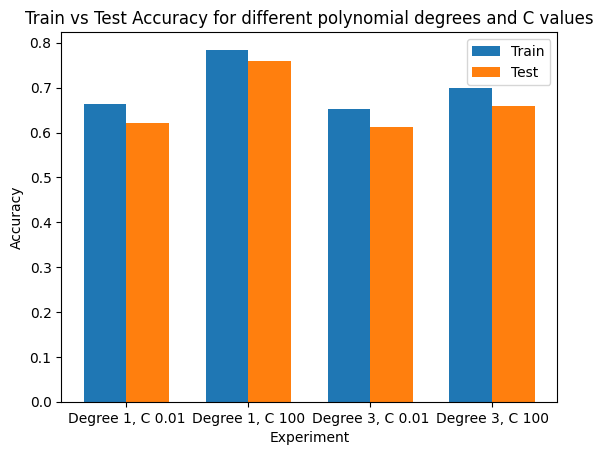

In [ ]:
# Plotting the accuracies
x = np.arange(len(degrees))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')

ax.set_xlabel('Experiment')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy for different polynomial degrees and C values')
ax.set_xticks(x)
ax.set_xticklabels([f"Degree {d}, C {c}" for d, c in zip(degrees, C_values)])
ax.legend()

plt.show()